# Data Visualisation with Python
## Peer Graded Assignment
## Ali El Tom

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop) <br>
Data Analysis / Statistics <br>
Data Journalism <br>
Data Visualization <br>
Deep Learning <br>
Machine Learning <br>

The participants had three options for each topic: <strong>Very Interested</strong>, <strong>Somewhat interested</strong>, and <strong>Not interested</strong>.<br> <strong>2,233 respondents</strong> completed the survey.<br>

The survey results have been saved in a csv file and can be accessed through this link:<br>
<a href="https://cocl.us/datascience_survey_data">https://cocl.us/datascience_survey_data</a>

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

## Task 1
Use the pandas <strong>read_csv</strong> method to read the csv file into a pandas dataframe, that looks like the following:
<img src="https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/zZTfddhxEeisEhKURr0pTg_dd2d58abb47ce1fda0f1a1ccc29df9ca_Topic_Survey_Question.png?expiry=1559260800000&hmac=u60eOzXIe-xvo8dHEKpKi3Ko1LZ5f-IZYU8w3CyxHpI" alt="Pandas DataFrame">

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Once you have succeeded in creating the above dataframe, please upload a screenshot of your dataframe with the actual numbers. (5 marks)

In [1]:
# First import the Pandas library needed for this task
import pandas as pd

In [2]:
# Read the csv file from the link
df = pd.read_csv('https://cocl.us/datascience_survey_data', sep=',', index_col=0)
print('Data read into DataFrame df')

Data read into DataFrame df


In [4]:
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Task 2
Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.
<img src="https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/_sOFz1VjEeiOFxKmNjWWlA_b6128d40f6727aefb40724091be686b7_Bar_Chart_Masked.png?expiry=1559260800000&hmac=Kmmj5OUTi-6WSOdZwabE2_Rhbm77ckRp5dEIPZn-QCc" alt="image of bar chart">

In [5]:
# First import Matplotlib

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__)


Matplotlib version:  3.1.0


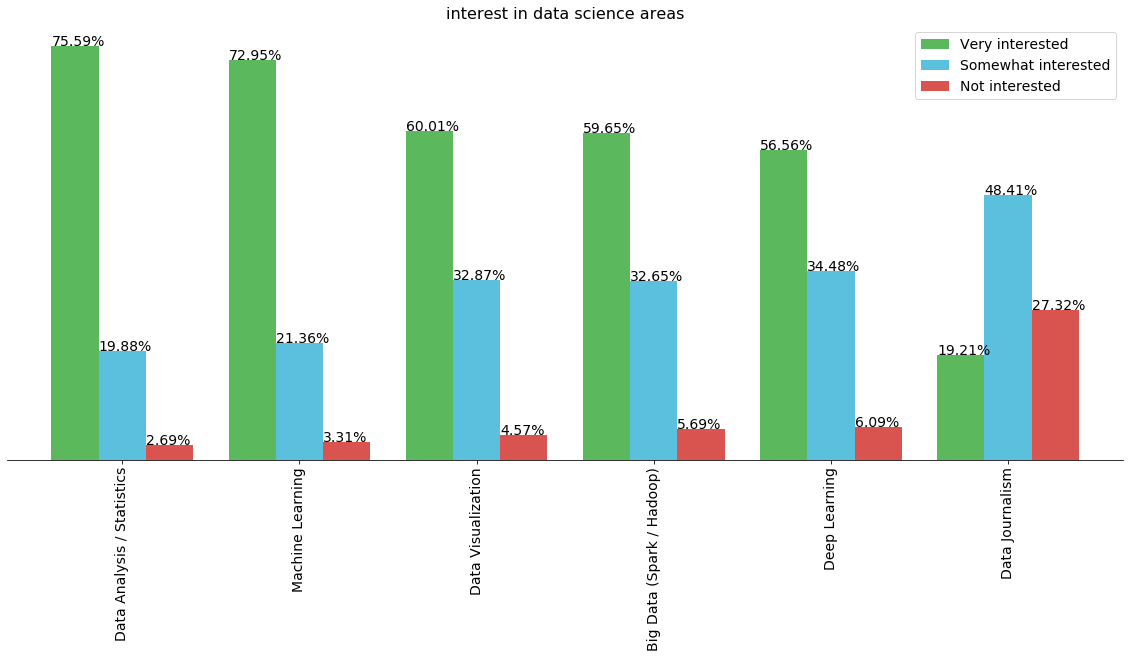

In [6]:
# Sort the dataframe in descending order of Very interested.
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

# Plot the data
# Ok use a figure size of (20, 8),
# Ok bar width of 0.8,
# Ok use color #5cb85c for the Very interested bars,
# Ok color #5bc0de for the Somewhat interested bars, 
# Ok and color #d9534f for the Not interested bars,
# Ok use font size 14 for the bar labels, percentages, and legend,
# Ok use font size 16 for the title, and,
# display the percentages above the bars as shown above, and remove the left, top, and right borders.
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
ax.set_title("interest in data science areas", size=16) 
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.NullLocator())

# Convert the numbers into percentages of the total number of respondents. 
# Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.2%}'.format(height/2233), (x, y + height + 0.01), size=14)
ax.legend(fontsize=14)

plt.show()



## Task 3 

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

1. Central,
2. Southern,
3. Bayview,
4. Mission,
5. Park,
6. Richmond,
7. Ingleside,
8. Taraval,
9. Northern, and,
10. Tenderloin.

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

<img src="https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/UcAIVlVkEeiDhgqYR-Lxvg_94c477dfeb3935cccb0b468f5c9ba46b_crime_dataset_masked.png?expiry=1559260800000&hmac=IzR0ehAnd-fO6LxEgWJ3Aw0FS75ISBKJHvbKPEe4yRo" alt="Dataframe">



In [15]:
# Read the csv file and convert to dataframe
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [16]:
df_incidents.shape

(150500, 13)

In [17]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [18]:
df_incidents['PdDistrict'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [19]:
df_incidents.groupby(['PdDistrict']).groups.keys()

dict_keys(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'])

In [23]:
df_crime_renamed = df_incidents.groupby('PdDistrict')['PdId'].count().reset_index()
df_crime_renamed

,PdDistrict,PdId
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [24]:
df_crime_renamed.rename(columns={'PdDistrict':'Neighborhood', 'PdId':'Count'}, inplace=True)

In [25]:
df_crime_renamed

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

- it is centred around San Francisco,
- you use a zoom level of 12,
- you use fill_color = 'YlOrRd',
- you define fill_opacity = 0.7,
- you define line_opacity=0.2, and,
- you define a legend and use the default threshold scale.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:
<img src="https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/okW9uVVkEeiDhgqYR-Lxvg_9e78dcfa79cdc9d18d31ac51173865db_sanfran_map_masked.png?expiry=1559260800000&hmac=se1f85a3rflzhPamCunL1T8hKU2_PTPpehmxLsa5XYc" alt="Choropleth map">

In [22]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [28]:
# download the geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [30]:
sf_geo = r'san-francisco.geojson' # geojson file

# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create a plain world map
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# generate choropleth map
sanfran_map.choropleth(
    geo_data=sf_geo,
    data=df_crime_nh,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Fransisco'
)

# display map
sanfran_map

FileNotFoundError: [Errno 2] No such file or directory: 'san-francisco.geojson'